Obliczenie przepywu Couette w Pythonie dla plynu nienewtonowskiego - wizualizacja wynikow, porownanie z rozwiazaniem dla plynu liniowego, serializacja wynikow


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# zmienne
h = 1 # wysokosc
N = 20 # liczba siatek
dy = h/N # krok w osi y
dt = 0.001 # krok czasowy
mu = 1 # lepkosc newtonowska
G = 0 # stala cisnienia
y = np.arange(1,N+1)
u = np.zeros([N]); # wektor predkosci

# warunki poczatkowe
u[-1] = 1
u[0] = 0


def Couette(G, d):

    eps = 1e-5
    err = 1
    n = 1
    u_n = []
    fig = plt.figure(figsize=(20,12)) # figure size

    while (err > eps):

        for i in range(1,N-1):
            u_old = np.copy(u)
            u[i] = u_old[i] + G*dt + d[i]*(u_old[i+1] - 2*u_old[i] + u_old[i-1]) #BTCS Backward Time Central

        if (n % 10 == 0):
            plt.plot(u,y,'-',linewidth=2.0)
            u_n.append(u)
            


        err = np.abs(np.sum(u-u_old))

        n = n + 1

    plt.xlabel('u(y)', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.grid()
    plt.savefig('filePlot.png')
    plt.show()

    return u



In [2]:
d = (mu*dt)/(dy**2) # stala dyfuzji newtonowskiego
dn = []
for i in range(1,N+1):
    dn.append(d)

print(dn)

[0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999]


In [3]:
mun = np.arange(1.5, 2.55, 0.05)  
dnn = []
for j in range(1,N+1):  
    d_n = (mun[j]*dt)/(dy**2)
    dnn.append(d_n)

print(dnn)

[0.62, 0.6399999999999999, 0.6599999999999999, 0.6799999999999999, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.8400000000000001, 0.86, 0.88, 0.9000000000000002, 0.9200000000000002, 0.9400000000000001, 0.9600000000000001, 0.9800000000000003, 1.0000000000000002]


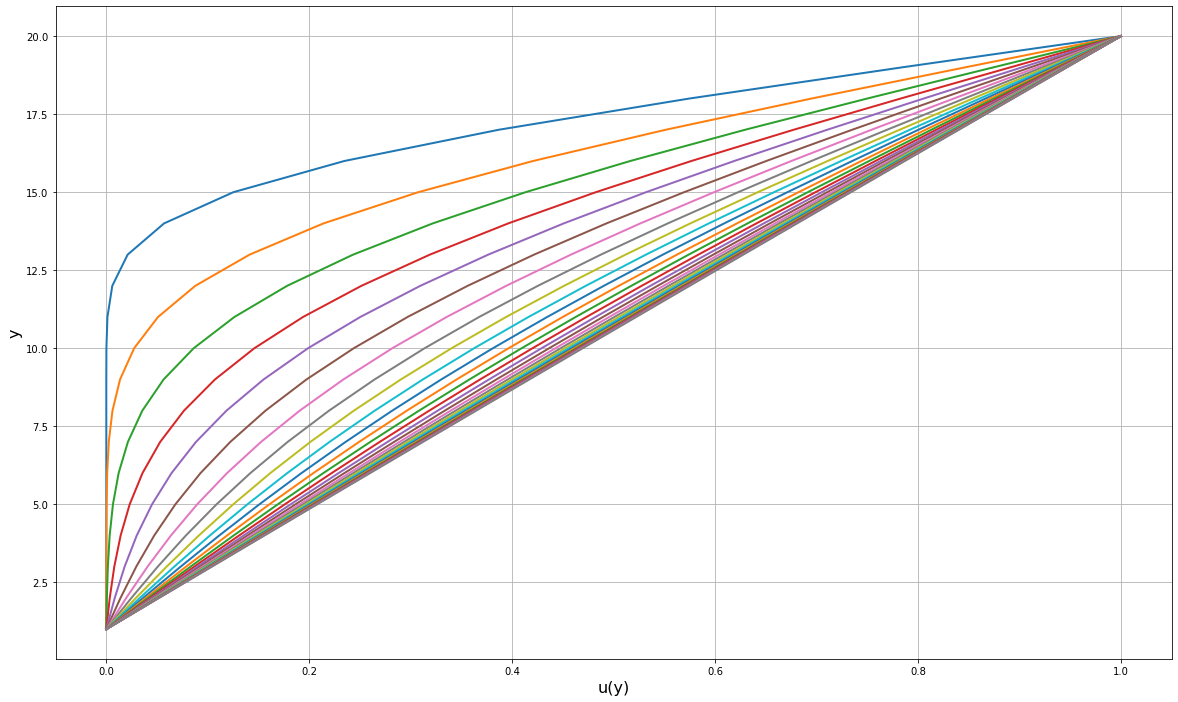

In [4]:
class Case:
    def __init__(self, fname):
        self.file_name = fname # File name from which we will read
        
        self.Y = np.array # Y coordinate
        self.u = np.array # Components of velocity acros Y

clist = []
c = Case("file_0.dat")
c.Y = np.arange(1,N+1)
c.u = Couette(G, dn)
clist.append(c)


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# zmienne
h = 1 # wysokosc
N = 20 # liczba siatek
dy = h/N # krok w osi y
dt = 0.001 # krok czasowy
mu = 1 # lepkosc newtonowska
G = 0 # stala cisnienia
#y = range(1,N+1)
y = np.arange(1,N+1)
u = np.zeros([N]); # wektor predkosci

# warunki poczatkowe
u[-1] = 1
u[0] = 0


def Couette(G, d):

    eps = 1e-5
    err = 1
    n = 1
    u_n = []
    fig = plt.figure(figsize=(20,12)) # figure size

    while (err > eps):

        for i in range(1,N-1):
            u_old = np.copy(u)
            u[i] = u_old[i] + G*dt + d[i]*(u_old[i+1] - 2*u_old[i] + u_old[i-1])

        if (n % 10 == 0):
            plt.plot(u,y,'-',linewidth=2.0)
            u_n.append(u)
            


        err = np.abs(np.sum(u-u_old))

        n = n + 1

    plt.xlabel('u(y)', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.grid()
    plt.savefig('filePlot.png')
    plt.show()

    return u


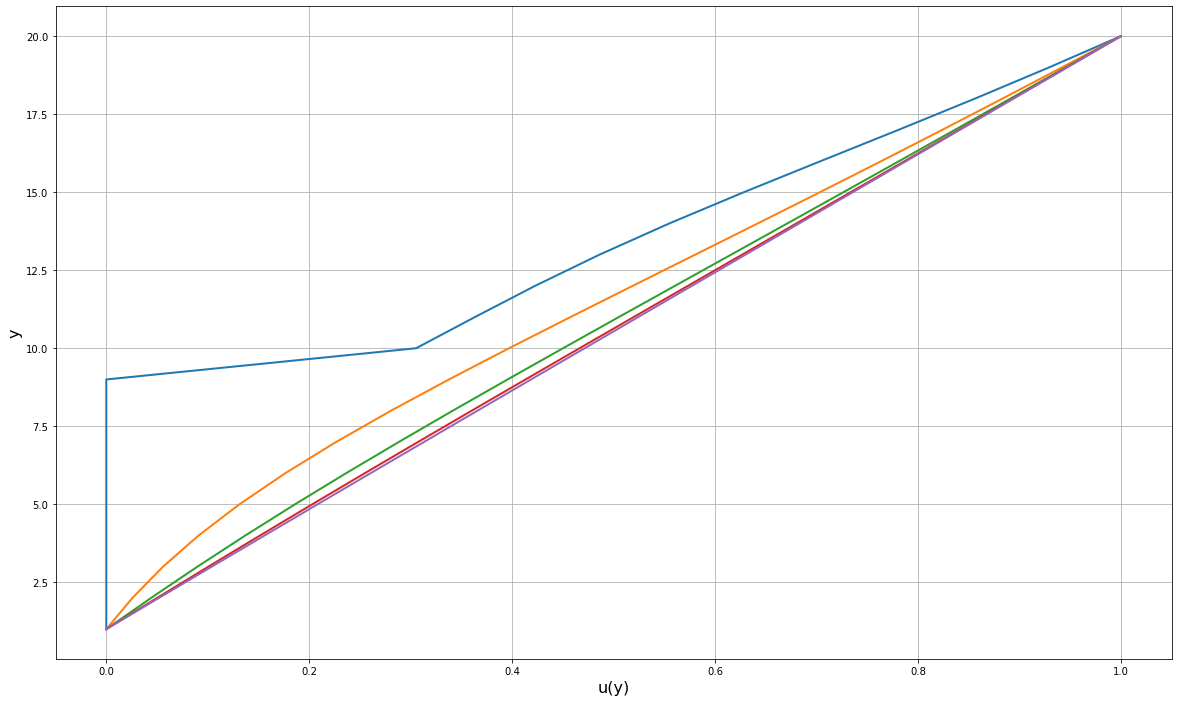

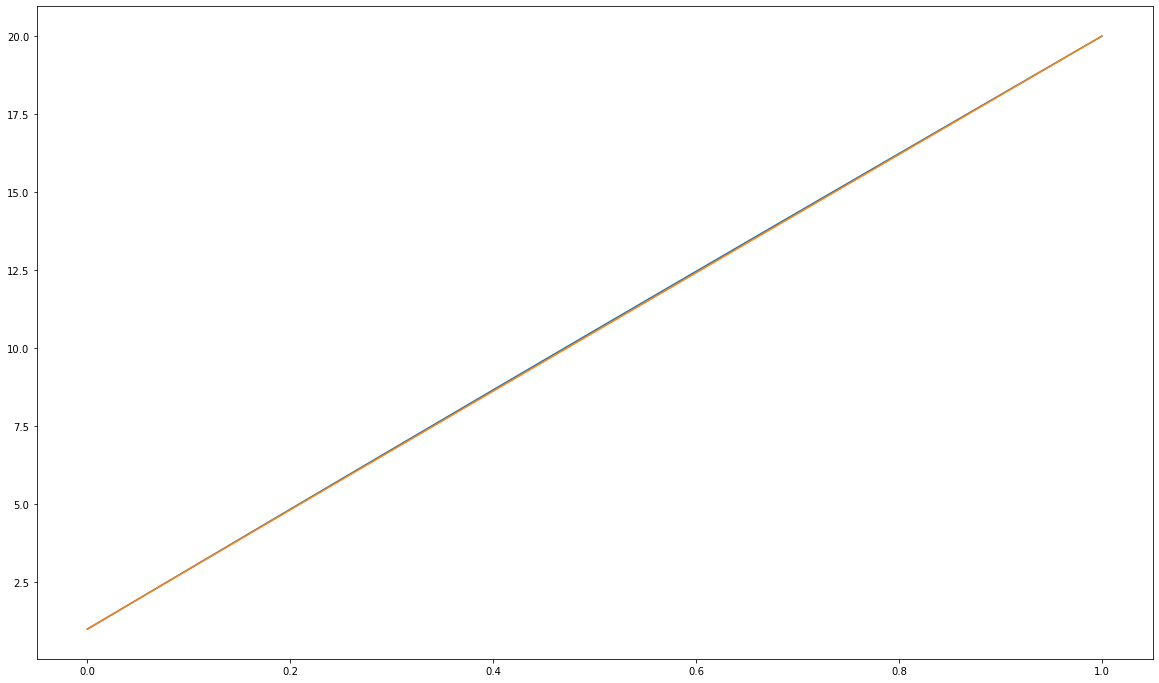

In [6]:
c1 = Case("file_1.dat")
c1.Y = np.arange(1,N+1)
c1.u = Couette(G, dnn)
clist.append(c1)

fig = plt.figure(figsize=(20,12))
for c in clist:
    plt.plot(c.u, c.Y)


In [7]:
import msgpack


In [8]:
"""Encoding function"""
def enc_full(obj):
    if type(obj) == Case: # make sure obj is of some type
        code = 1 # A flag determining the type
        # pack and return
        return msgpack.ExtType(code, msgpack.packb([obj.file_name, 
                                                    obj.Y.tobytes(),
                                                    obj.u.tobytes()]))
    raise TypeError # Rise an error if type not handled


In [9]:
msgpack.dump(clist, open( 'aaa.dat', "wb" ), default=enc_full)

In [10]:
def dnc(code, data):
    if code == 1: # a flag determining the type
        # call the unpack on the data passed in here
        file_name, Y, u = msgpack.unpackb(data)
        
        # make the object
        c = Case(file_name)
        
        c.Y = np.frombuffer(Y)
        c.u = np.frombuffer(u)
        
        # return the object outside
        return c
    # in case the type is either a build in or other
    return msgpack.ExtType(code, data)

In [11]:
recovered_list = msgpack.load(open( 'aaa.dat', "rb"), ext_hook=dnc)

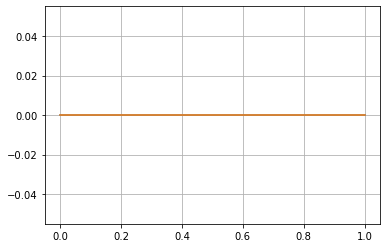

In [16]:
for c in recovered_list:
    plt.plot(c.u, c.Y)
plt.grid()